## DIEM - Dimension Insensitive Euclidean Metric

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist

### Cosine Similarity and Euclidean Distance
if we have two vectors $ a=[a_1,a_2,a_3,....a_n], b=[b_1,b_2,b_3,....b_n]$ then the cosine similarity and Euclidean distance between them is->
```math
\begin{align*}
     & \text{Euclidean distance}=\sqrt{\textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2} \\
     & \text{cosine similarity}=\frac{\vert a^{T} \cdot b \rvert}{\lVert a \rVert \cdot \lVert b \rVert} \\
% \begin{align*}
     % & \text{Euclidean distance(d)}=\sqrt{\textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2} \\
     &  d=\sqrt{\textstyle\sum_{i=1}^n \lparen a_i^2+b_i^2-2a_i b_i \rparen} \\
     & d^2 =\textstyle\sum_{i=1}^n \lparen a_i^2+b_i^2-2a_i b_i \rparen \\
     & \textstyle\sum_{i=1}^na_i b_i =\frac{\textstyle\sum_{i=1}^n \lparen a_i^2+b_i^2\rparen -d^2}{2}\\
     &   a^{T} \cdot b  = \frac{\lVert a \rVert^2 + \lVert b \rVert^2 -d^2}{2} \\
     & \text{ if our vector are unit vectors}\\
     &  a^{T} \cdot b  = \frac{2-d^2}{2} \\
     &  a^{T} \cdot b  = 1-\frac{d^2}{2} \\
     & \text{cosine similarity} \lparen cos\theta \rparen = \lvert 1-\frac{d^2}{2} \rvert  \text{ in case of unit vectors}\\
     & cos \theta = \lvert 1-\frac{d^2}{2} \rvert
\end{align*}
```
$d$ is the distance between two unit vectors so $0 \leq d\leq 2$ and how cosine similarity varies w.r.t $d$ is shown in graph below.

In [3]:
ed=np.arange(start=0,stop=2,step=0.01)
cos_sim=np.abs(1-0.5*(ed**2))

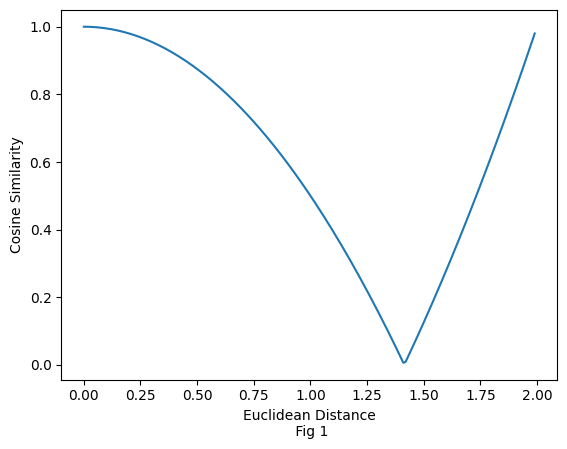

In [5]:
plt.plot(ed,cos_sim)
plt.xlabel('Euclidean Distance\n Fig 1')
plt.ylabel("Cosine Similarity")
plt.show()

In [6]:
def calculate_similarity(x:np.ndarray)->np.ndarray:
    return np.abs(1-0.5*(x**2))

In [7]:
# for all real
def calc_pairwise_cosine_similarity(low,high,num_points,dims):
    data=[]
    distances=[]
    non_norm_dist=[]
    for i in dims:
        arr=np.random.uniform(low=low,high=high,size=[num_points,i])
        norms=np.linalg.norm(arr,ord=2,axis=1)
        normalized_arr=arr.T/norms
        dist=pdist(normalized_arr.T,metric='euclidean')
        non_norm_pdist=pdist(arr,metric='euclidean')
        non_norm_dist.append(non_norm_pdist)
        distances.append(dist)
        data.append(calculate_similarity(dist))
    return data,distances,non_norm_dist

In [8]:
cos_sim_all_real,distances_all_real,non_norm_dist_real=calc_pairwise_cosine_similarity(low=-1,high=1,num_points=1000,dims=list(range(2,103,10)))
cos_sim_pos_real,distances_pos_real,non_norm_dist_pos=calc_pairwise_cosine_similarity(low=0,high=1,num_points=1000,dims=list(range(2,103,10)))
cos_sim_neg_real,distances_neg_real,non_norm_dist_neg=calc_pairwise_cosine_similarity(low=-1,high=0,num_points=1000,dims=list(range(2,103,10)))

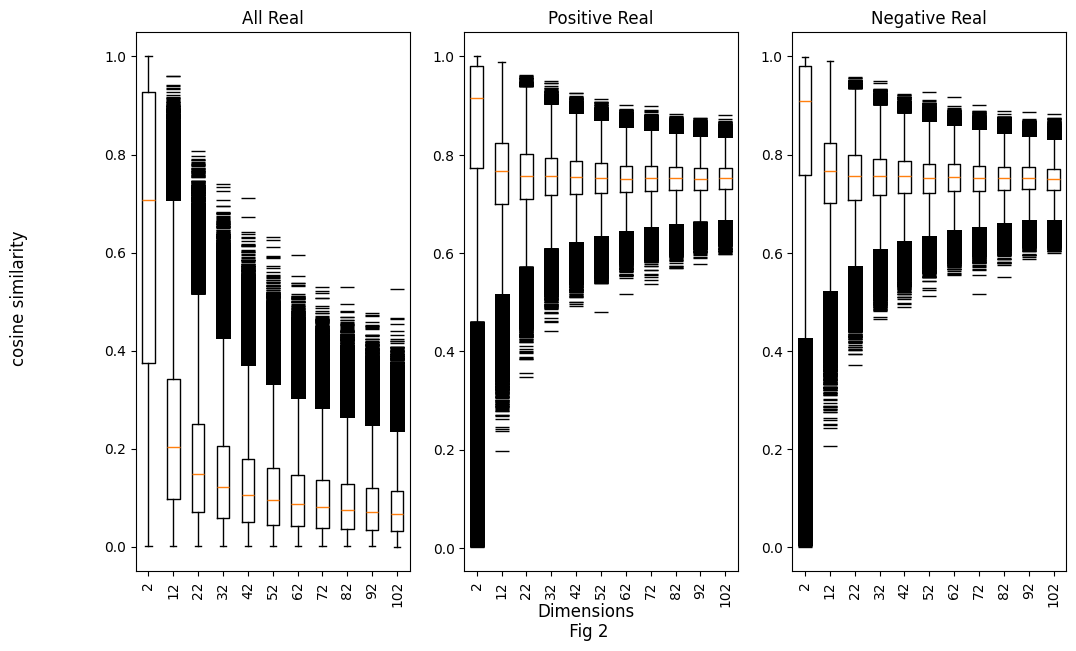

In [10]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(7)
fig.supxlabel('Dimensions\n Fig 2')
fig.supylabel('cosine similarity')
ax[0].boxplot(x=cos_sim_all_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=cos_sim_pos_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=cos_sim_neg_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

Here first we have generate 1000 random vectors for each dimensions=[2,12,22,32,42,52,62,72,82,92,102]. Each vector($a$) has component in the range $-1\leq a_i \leq 1$ for all real, $0 \leq a_i \leq 1$ for real positive and $ -1 \leq a_i \leq 0$ for real positive. Then normalized these vectors and calculate pairwise cosine similarity and euclidean distances.

### Conclusion
As we can see in figure 2 as dimensions increases the cosine similarity and euclidean distance both starts to converge towards a single point. So both are dependent on dimensionality of the data. So both the metrics are not good choice for comparing the high dimensional data. 

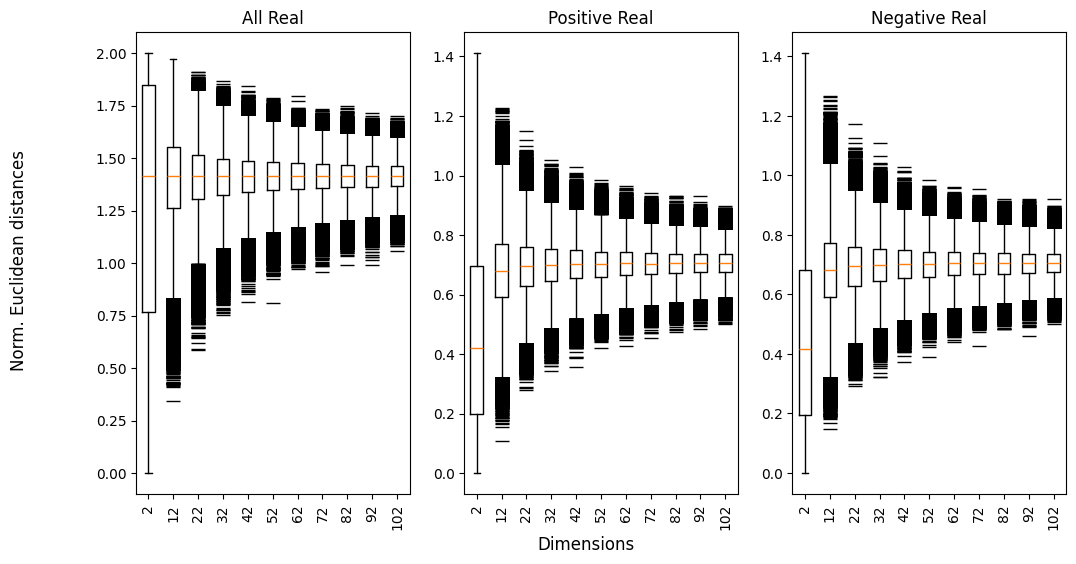

In [9]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(6)
fig.supxlabel('Dimensions')
fig.supylabel('Norm. Euclidean distances')
ax[0].boxplot(x=distances_all_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=distances_pos_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=distances_neg_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

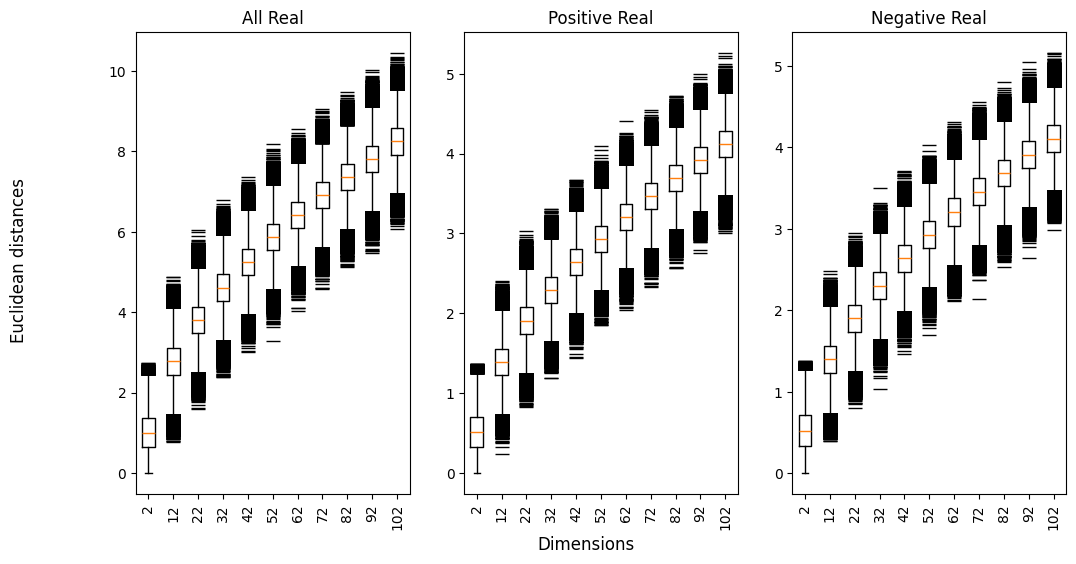

In [10]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(6)
fig.supxlabel('Dimensions')
fig.supylabel('Euclidean distances')
ax[0].boxplot(x=non_norm_dist_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=non_norm_dist_pos,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=non_norm_dist_neg,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

if we take non normalized vectors then we can see it is fairly variable but in higher dimensions its value can go beyond the range of data type we are using. It is also not a good indicator of similarity. So we have to find another way of similarity comparison.

### Expected value of Euclidean distance
```math
\begin{align*}
   & d=\sqrt{\textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2} \\
   & \text{consider } v_m \leq a_i,b_i \leq v_M  \forall i \in \lbrace 1,2,3,....n \rbrace \\
   & d_{max} \lparen n \rparen =\sqrt{n} \lparen v_M - v_m \rparen \\
   & E\lbrack d \rbrack = E\lbrack \sqrt{\textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2} \rbrack \\
   & \text{ by jensen's inequality} \\
   & E\lbrack d \rbrack \leq \sqrt{ E \lbrack \textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2 \rbrack} \\
   & E\lbrack d \rbrack \leq \sqrt{n\cdot E \lbrack \lparen a-b \rparen^2 \rbrack} \\
   & E\lbrack d \rbrack \leq \sqrt{n} \left ( \int_{v_m}^{v_M} \int_{v_m}^{v_M} \frac{\left (a-b \right )^2}{\left(v_M -v_m\right)^2}dadb \right )^{\frac{1}{2}}\\
   & E\lbrack d \rbrack \leq \sqrt{\frac{n}{6}}\left(v_M -v_m\right) \text{(analytical upper bound of expected value of distance)}\\
\end{align*}
```

In [11]:
dimensions=list(range(2,103,10))
num_samples=1000
distances=[non_norm_dist_real,non_norm_dist_pos,non_norm_dist_neg]

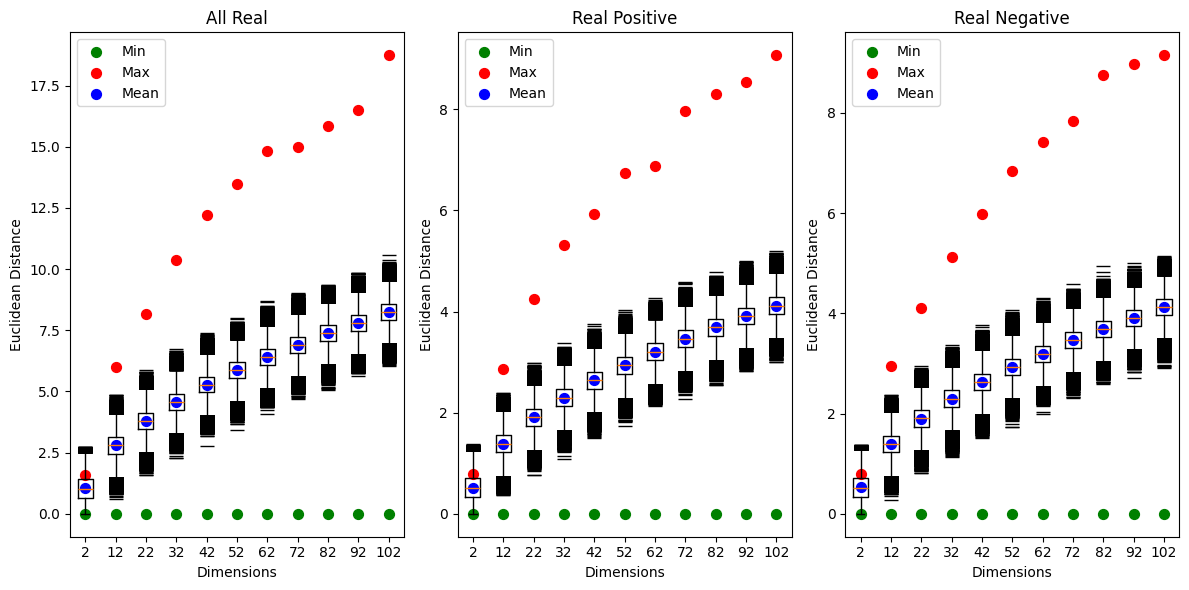

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
labels = ['All Real','Real Positive', 'Real Negative']

for i in range(3):
    box = axs[i].boxplot(distances[i],flierprops=dict(marker='_', color='red', markersize=10))
    axs[i].set_title(labels[i])
    axs[i].set_xlabel('Dimensions')
    axs[i].set_ylabel('Euclidean Distance')
    axs[i].set_xticklabels(dimensions)

    for j, dist in enumerate(distances[i]):
        min_val = np.min(dist)
        exp_max_val = np.sqrt(dimensions[j]/6)*(np.max(dist)-min_val)
        mean_val = np.mean(dist)
        
        axs[i].scatter(j + 1, 0, color='green', s=50, label='Min' if j == 0 else "")
        axs[i].scatter(j + 1, exp_max_val, color='red', s=50, label='Max' if j == 0 else "")
        axs[i].scatter(j + 1, mean_val, color='blue', s=50, label='Mean' if j == 0 else "")
    
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


above graph show the maximum expected value of euclidean distance(red), min value(green) and mean value(blue) 

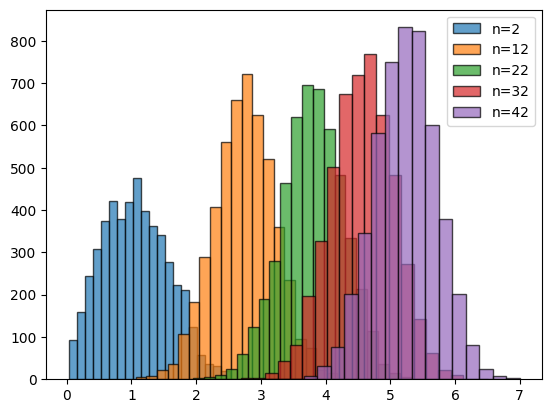

In [13]:
plt.hist(pdist(np.random.uniform(low=-1,high=1,size=[100,2]),metric='euclidean'),bins=20,edgecolor='black',alpha=0.7,label='n=2')
plt.hist(pdist(np.random.uniform(low=-1,high=1,size=[100,12]),metric='euclidean'),bins=20,edgecolor='black',alpha=0.7,label='n=12')
plt.hist(pdist(np.random.uniform(low=-1,high=1,size=[100,22]),metric='euclidean'),bins=20,edgecolor='black',alpha=0.7,label='n=22')
plt.hist(pdist(np.random.uniform(low=-1,high=1,size=[100,32]),metric='euclidean'),bins=20,edgecolor='black',alpha=0.7,label='n=32')
plt.hist(pdist(np.random.uniform(low=-1,high=1,size=[100,42]),metric='euclidean'),bins=20,edgecolor='black',alpha=0.7,label='n=42')
plt.legend()
plt.show()

## Dimension Insensitive Euclidean Metric (DIEM)
https://arxiv.org/pdf/2407.08623 \
This paper describes a new metric which is called $ \textcolor{blue}{\text{Dimension Insensitive Euclidean Metric}} $ which overcomes the drawbacks of cosine similarity in high dimensional data. 

In [16]:
def calculate_diem(u,v,v_M,v_m,var,mean)->float:
    dist=np.linalg.norm(u-v,ord=2)
    metric=(dist-mean)*(v_M-v_m)/var
    return metric

In [17]:
def cal_pairwise_diem(points:np.ndarray)->np.ndarray:
    v_M=np.max(points)
    v_m=np.min(points)
    var=np.var(points)
    pairwise_euclidean=pdist(points,metric='euclidean')
    exp_dist=np.mean(pairwise_euclidean)
    calc_diem=lambda u,v:calculate_diem(u,v,v_M,v_m,var,exp_dist)
    pairwise_diem=pdist(points,metric=calc_diem)
    return pairwise_diem

In [18]:
def calc_batch_diem(points_list:list[np.ndarray])->list[np.ndarray]:
    diems=[]
    for points in points_list:
        pairwise_diem=cal_pairwise_diem(points)
        diems.append(pairwise_diem)
    return diems

In [19]:
points_real=[]
points_pos=[]
points_neg=[]
for i in range(2,103,10):
    arr=np.random.uniform(low=-1,high=1,size=[1000,i])
    points_real.append(arr)
    arr=np.random.uniform(low=0,high=1,size=[1000,i])
    points_pos.append(arr)
    arr=np.random.uniform(low=-1,high=0,size=[1000,i])
    points_neg.append(arr)


In [20]:
diems_real=calc_batch_diem(points_real)
diems_pos=calc_batch_diem(points_pos)
diems_neg=calc_batch_diem(points_neg)

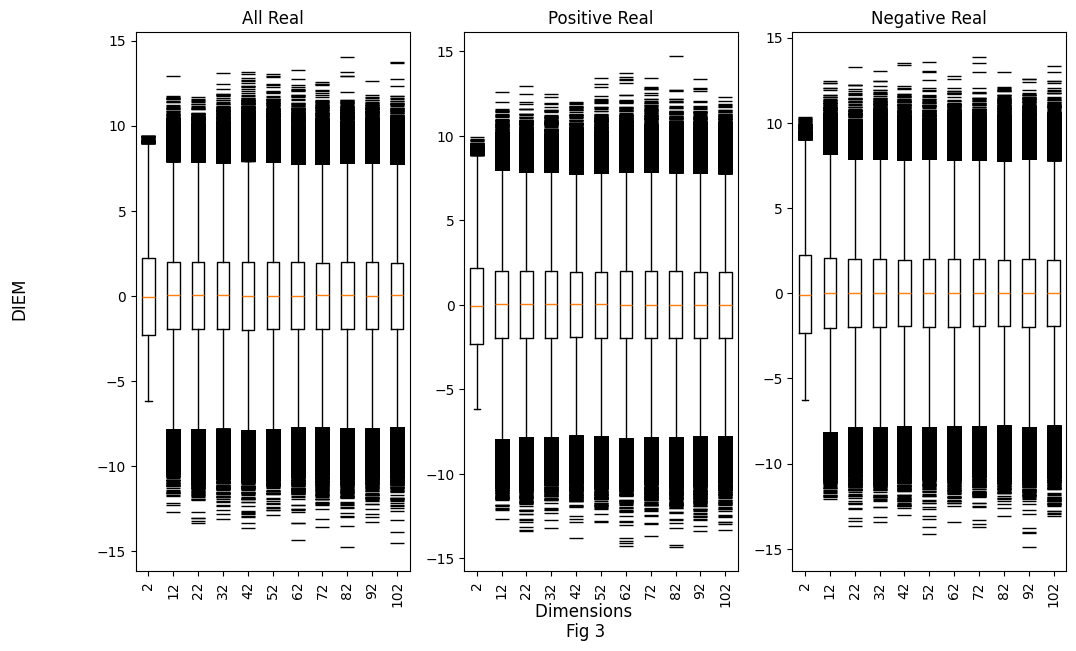

In [22]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(7)
fig.supxlabel('Dimensions \nFig 3')
fig.supylabel('DIEM')
ax[0].boxplot(x=diems_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=diems_pos,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=diems_neg,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

```math
\begin{align*}
 & DIEM=\frac{v_M-v_m}{\sigma^2 \left(n\right)} \left(\sqrt{\textstyle\sum_{i=1}^n \lparen a_i-b_i \rparen^2}-E\lbrack d \left(n\right)\rbrack\right)
\end{align*}
```
this is the new metric proposed by the paper. To calculate its value we need $v_M$(maximum value of any vector component), $v_m$(minimum value of any vector component) and the expected value of the euclidean distance. To calculate expected value of euclidean distance we can use $\textcolor{blue}{\text{Monte Carlo}}$ method. To calculate it we generate random vectors from the same space and calculate the pairwise distance between them. Take the average of these distances. In Figure 3 we can see it is not converging to the single points as dimensionality increases. So it is a good choice for similarity comparison between the two points in higher dimensions

# How to compare 
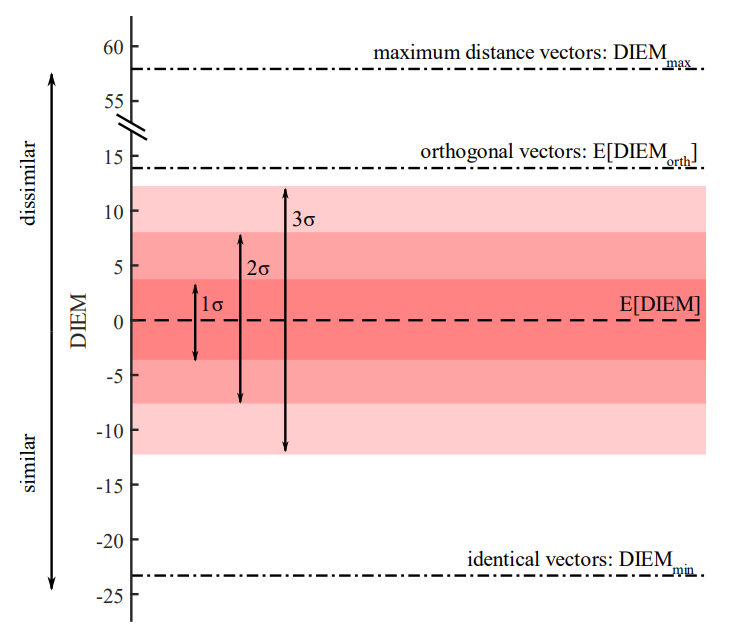

### Conclusion
When we compare the similarity between two vectors. It should not depend on dimensionality of the data. Cosine similarity is dependent on dimensionality of the data, But DIEM is not dependent. So it is a good idea to use DIEM for similarity calculation.